## 逻辑回归
对于分类问题，可以通过逻辑回归模型解决。其优点在于计算代价不高，易于理解和实现。但是缺点也有，容易欠拟合，分类精度可能不高。

逻辑回归需要用到sigmoid激活函数，其公式为$g(z)=\frac{1}{1+e^{-z}}$，而根据$h_\theta(x)=g(\theta^TX)$，可以算出输入变量为1的概率，若结果为0.7，则表示有70%的概率为1

逻辑回归通常不适用于多分类问题，但是可以通过多次使用逻辑回归实现多分类（one-vs-all)或者使用softmax回归（one-vs-one）

In [1]:
from sklearn.datasets import load_breast_cancer
from TV_examine.algorithm import logisticregression
from TV_examine.data_preprocessing import preprocessing
from TV_examine.model_assessment import clf, divide_data
import numpy as np
import matplotlib.pyplot as plt

## 数据集的选择
因为是二分类问题，这里使用了乳腺癌数据集。先是查看数据特征以及大致分布，可得知有30个特征，569个样本，且特征均为连续值，符合目标算法。

In [2]:
cancer = load_breast_cancer()
cancer.feature_names, cancer.target_names, cancer.data.shape, cancer.target.shape

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 array(['malignant', 'benign'], dtype='<U9'),
 (569, 30),
 (569,))

In [3]:
a = preprocessing.Standardization()
X = a.fit_transform(cancer.data)
X

array([[ 1.09609953, -2.0715123 ,  1.26881726, ...,  2.2940576 ,
         2.74820411,  1.93531174],
       [ 1.82821197, -0.35332152,  1.68447255, ...,  1.08612862,
        -0.24367526,  0.28094279],
       [ 1.5784992 ,  0.45578591,  1.56512598, ...,  1.95328166,
         1.15124203,  0.20121416],
       ...,
       [ 0.70166686,  2.04377549,  0.67208442, ...,  0.41370467,
        -1.10357792, -0.31812924],
       [ 1.83672491,  2.33440316,  1.98078127, ...,  2.28797231,
         1.9173959 ,  2.21768395],
       [-1.80681144,  1.22071793, -1.81279344, ..., -1.7435287 ,
        -0.04809589, -0.75054629]])

## 数据处理及模型评估
- 这里使用留出法对数据进行划分。留出法：将数据集划分为两个互斥的部分，一部分做训练集一部分做测试集。以下测试集与训练集值比值为0.2.
- 从绘制的混淆矩阵中可得知只有一个预测错误

In [4]:
X_train, X_test, y_train, y_test = divide_data.train_test_split(X, cancer.target, 0.2)

In [5]:
lr = logisticregression.LogisticRegression()
lr.fit(X_train, y_train)
y_pr_rate = lr._predict(X_test)

In [6]:
ass = clf.clf_assessment(y_pr_rate, y_test)

### 混淆矩阵的绘制

In [7]:
ass.print_matrix()

           预测结果    
真实     正例      反例
正例      67        1
反例       1       45


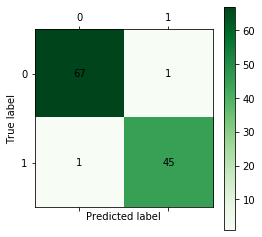

In [8]:
ass.print_matrix(True)

### 模型评估

In [9]:
print("准确率：",ass.accuracy())
print("精准率：",ass.precision())
print("召回率：",ass.recall())
print("F1-Score：",ass.F1_score())
ass.count_AUC()

准确率： 0.9824561403508771
精准率： 0.9852941176470589
召回率： 0.9852941176470589
F1-Score： 0.9852941176470589
AUC值为： 0.9968030690537084


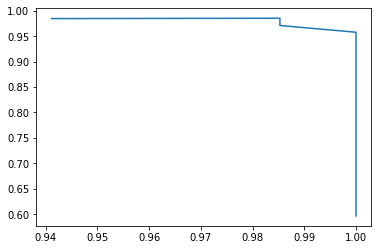

In [10]:
ass.paint_PR()

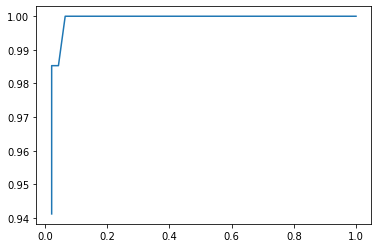

In [11]:
ass.paint_ROC()

## 对比
对比sklearn中的逻辑回归，看看效果如何

结果也差不多吧

In [12]:
from sklearn.linear_model import LogisticRegression as LR_SK
from sklearn.metrics import classification_report
sk = LR_SK()
sk.fit(X_train, y_train)
y_pr = sk.predict(X_test)
print(classification_report(y_test, y_pr))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.97      0.99      0.98        68

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/Users/huangzhuoxi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
